# Supervised Learning Project: Predict the likelihood of a liability customer buying personal loans

# 1. Import the necessary libraries

In [169]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import copy

# 2. Read the data as a data frame (Bank_Personal_Loan_Modelling.csv)

In [170]:
# Read the data into Data Frame
# Head returns the first 5 rows of the dataframe to have initial glance at the data and review the data format
data=pd.read_csv("Bank_Personal_Loan_Modelling.csv")
variables=data.drop("Personal Loan",axis=1)
target=data["Personal Loan"]
# Move target variable to the end
pldata = variables.join(target)
pldata.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0


In [171]:
pldata.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,1,1,0


# 3. Exploratory Data Analysis

# a. Shape of the data

In [172]:
# Shape of the data: Print the number of rows and columns to give dimensions of the data
pldata.shape

(5000, 14)

# b. Data Information 

In [173]:
# Data Info: Print the information on data type and presence of null values.
pldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Variables   
ID - Customer ID   
Age - Customer's age in completed years   
Experience - Number of years of professional experience     
Income - Annual income of the customer (in \\$ 1000)       
ZIP Code - Home Address ZIP code    
Family - Family size of the customer    
CCAvg - Avg. spending on credit cards per month (in \\$ 1000)    
Education - Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional    
Mortgage - Value of house mortgage if any (in \\$ 1000)    
Securities Account - Does the customer have a securities account with the bank?    
CD Account - Does the customer have a Certificate of Deposit (CD) account with the bank?    
Online - Does the customer use internet banking facilities?       
CreditCard - Does the customer uses a credit card issued by UniversalBank?       
Personal Loan - Did this customer accept the personal loan offered in the last campaign?    

****Binary Variables****    
Personal Loan (0/1) - This is our target variable    
Securities Account (0/1)   
CD Account (0/1)   
Online (0/1)   
Credit Card (0/1)    

****Interval Variables****    
Age   
Experience    
Income    
CCAvg     
Mortgage     

****Ordinal Variables****    
Family     
Education

****Nominal Variables****    
ID     
Zip Code

# c. Checking the presence of missing values 

In [174]:
# Presence of missing values using isnull function
pldata.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [175]:
pldata.isnull().values.any()

False

#### Analysis
There is no presence of null which implies there is **no empty or NaN**    
The data types are proper for numerical columns which signifies that **no junk value** in these columns

# d. Data Columns and Description

In [176]:
pldata.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'Personal Loan'],
      dtype='object')

In [177]:
# Describe the data to understand the attributes and their statistical properties
pldata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [178]:
#finding unique data
pldata.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
Personal Loan            2
dtype: int64

#### Analysis
**ID** is unique running number for the records

**Age** is normally distributed with majority of customers falling between 30 years and 60 years of age. We can confirm this by looking at the describe statement above, which shows mean is almost equal to median    

**Experience** is normally distributed with more customer having experience starting from 8 years. Here the mean is equal to median. There are negative values in the Experience.

**Income** is positively skewed. Majority of the customers have income between 45K and 55K. We can confirm this by saying the mean is greater than the median   

**CCAvg** is also positively skewed and average spending is between 0K to 10K and majority spends less than 2.5K

**Mortgage**: More than 50% do not have any mortgage. Another positively skewed variable


##### Removing the negative values from **Experience** column

In [179]:
pldata[pldata['Experience'] < 0]['Experience'].count()

52

In [180]:
# There are 52 negative values in the Experience column
pldata[pldata['Experience'] < 0]['Experience'].unique()

array([-1, -2, -3], dtype=int64)

In [181]:
dfExp = pldata.loc[pldata['Experience'] >0]
negExp = pldata.Experience < 0
negExp
column_name = 'Experience'
mylist = pldata.loc[negExp]['ID'].tolist()
exp_med = pldata.loc[:,"Experience"].median()
for id in mylist:
    pldata.loc[pldata.loc[np.where(pldata['ID']==id)].index, 'Experience'] = exp_med

In [182]:
# Checking if there are records with negative experience
pldata[pldata['Experience'] < 0]['Experience'].count()

0

In [183]:
pldata.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


**Negative values in Experience have been replaced with the median value**

# e. Data Distribution of all attributes

### Continous Variables; Age, Experience, Income, CCAvg, Mortgage

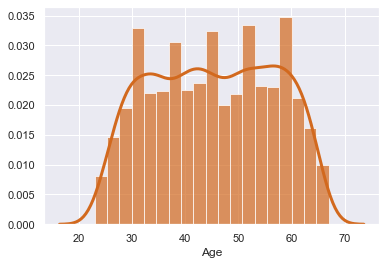

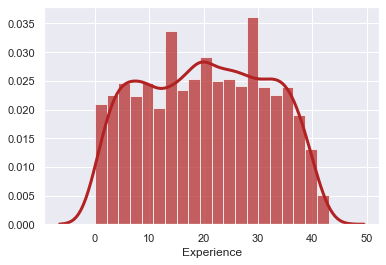

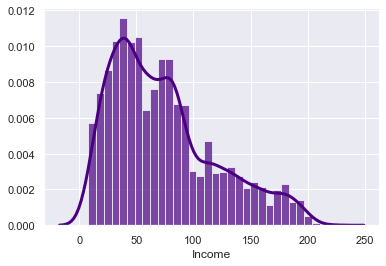

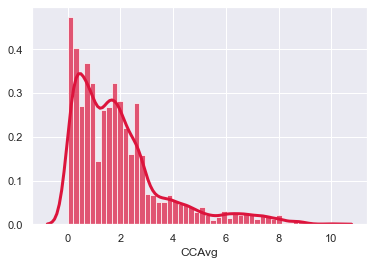

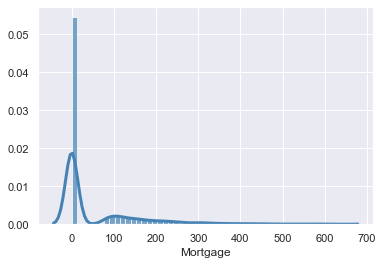

In [184]:
# Plot the columns to visually understand the distribution of the data
sns.distplot(pldata['Age'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="chocolate")
plt.show()
sns.distplot(pldata['Experience'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="firebrick")
plt.show()
sns.distplot(pldata['Income'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="indigo")
plt.show()
sns.distplot(pldata['CCAvg'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="crimson")
plt.show()
sns.distplot(pldata['Mortgage'],hist_kws={'alpha':.7}, kde_kws={'linewidth':3}, color="steelblue")
plt.show() 

#### Analysis
**Age** and **Experience** are normally distributed.   
**Income**, **CC Average** and **Mortgage** are positively skewed with tail on the right side which is also clear as mean is greater than the median for all three

In [185]:
# Print the measure of skewness
num_cols = ['Age','Experience','Income','CCAvg','Mortgage']
for col in num_cols:
    print('Skewness of ' ,col, ': ',pldata[col].skew(axis = 0))

Skewness of  Age :  -0.02934068151284029
Skewness of  Experience :  -0.01409975101962344
Skewness of  Income :  0.8413386072610816
Skewness of  CCAvg :  1.5984433366678663
Skewness of  Mortgage :  2.1040023191079444


#### Analysis
Age and Experience have low skewness and shows that data is symmetrical.  
Income data is moderatly positively skewed.   
CCAvg and Mortgage are highly skewed.    

#### Check for outliers using boxplot

Text(0.7, 45.3, 'IQR')

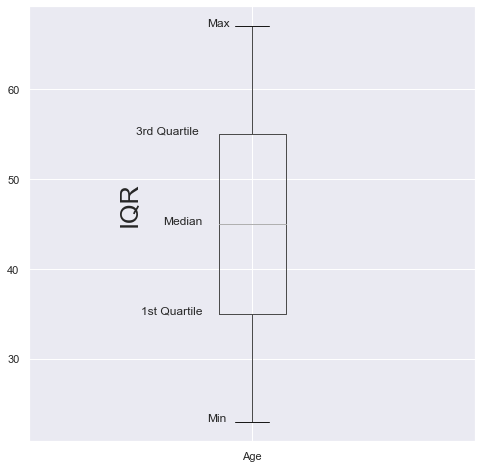

In [186]:
#Box plot for Age
pldata.boxplot(column="Age",return_type='axes',figsize=(8,8))
plt.text(x=0.74, y=55.00, s="3rd Quartile")
plt.text(x=0.8, y=45.00, s="Median")
plt.text(x=0.75, y=35.00, s="1st Quartile")
plt.text(x=0.9, y=23.00, s="Min")
plt.text(x=0.9, y=67.00, s="Max")
plt.text(x=0.7, y=45.30, s="IQR", rotation=90, size=25)

Text(0.7, 20.3, 'IQR')

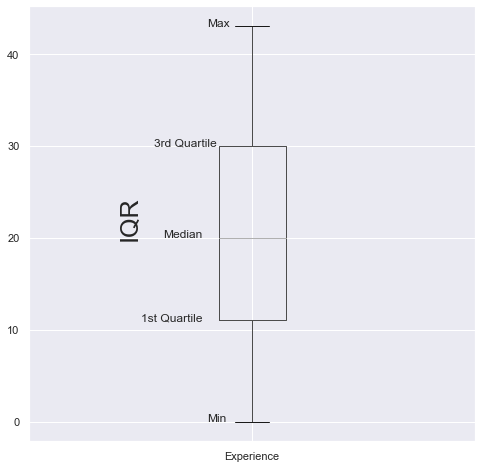

In [187]:
#Box plot for Experience
pldata.boxplot(column="Experience",return_type='axes',figsize=(8,8))
plt.text(x=0.78, y=30.00, s="3rd Quartile")
plt.text(x=0.8, y=20.00, s="Median")
plt.text(x=0.75, y=11.00, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=43.00, s="Max")
plt.text(x=0.7, y=20.30, s="IQR", rotation=90, size=25)

Text(0.7, 74.0, 'IQR')

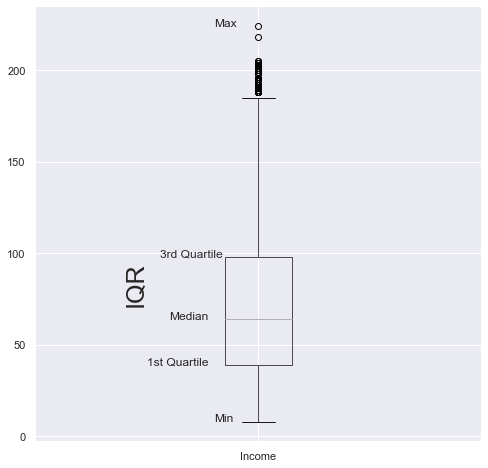

In [188]:
#Box plot for Income
pldata.boxplot(column="Income",return_type='axes',figsize=(8,8))
plt.text(x=0.78, y=98.00, s="3rd Quartile")
plt.text(x=0.8, y=64.00, s="Median")
plt.text(x=0.75, y=39.00, s="1st Quartile")
plt.text(x=0.9, y=8.00, s="Min")
plt.text(x=0.9, y=224.00, s="Max")
plt.text(x=0.7, y=74.00, s="IQR", rotation=90, size=25)

Text(0.7, 2.0, 'IQR')

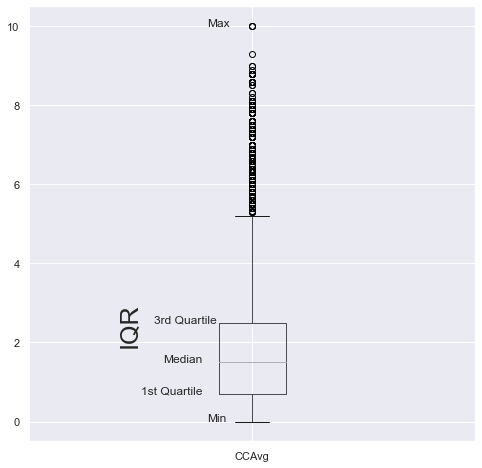

In [189]:
#Box plot for CC Average Spending
pldata.boxplot(column="CCAvg",return_type='axes',figsize=(8,8))
plt.text(x=0.78, y=2.50, s="3rd Quartile")
plt.text(x=0.8, y=1.50, s="Median")
plt.text(x=0.75, y=0.70, s="1st Quartile")
plt.text(x=0.9, y=0.00, s="Min")
plt.text(x=0.9, y=10.00, s="Max")
plt.text(x=0.7, y=2.00, s="IQR", rotation=90, size=25)

Text(0.7, 56.5, 'IQR')

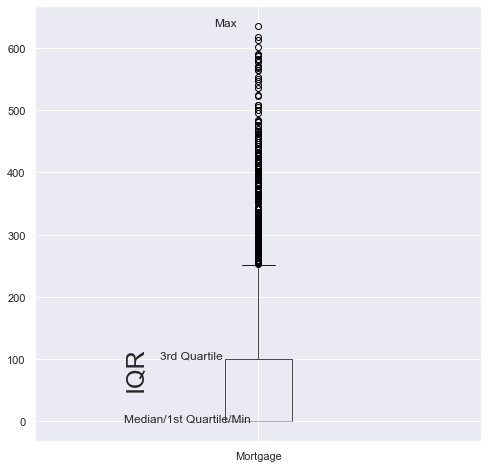

In [190]:
#Box plot for Mortgage
pldata.boxplot(column="Mortgage",return_type='axes',figsize=(8,8))
plt.text(x=0.78, y=101.00, s="3rd Quartile")
plt.text(x=0.7, y=0.00, s="Median/1st Quartile/Min")
plt.text(x=0.9, y=635.00, s="Max")
plt.text(x=0.7, y=56.50, s="IQR", rotation=90, size=25)

#### Analysis    
For **Mortgage**, **Income** and **CC Average Spending**, as clear by positive skewed distribution, the max whisker is long with multiple data points outside the limit showing large presence of outlier data   
**Age** and **Experience** are normally distributed with no presence of outlier

#### Pairplot and HeatMap to find the correlation

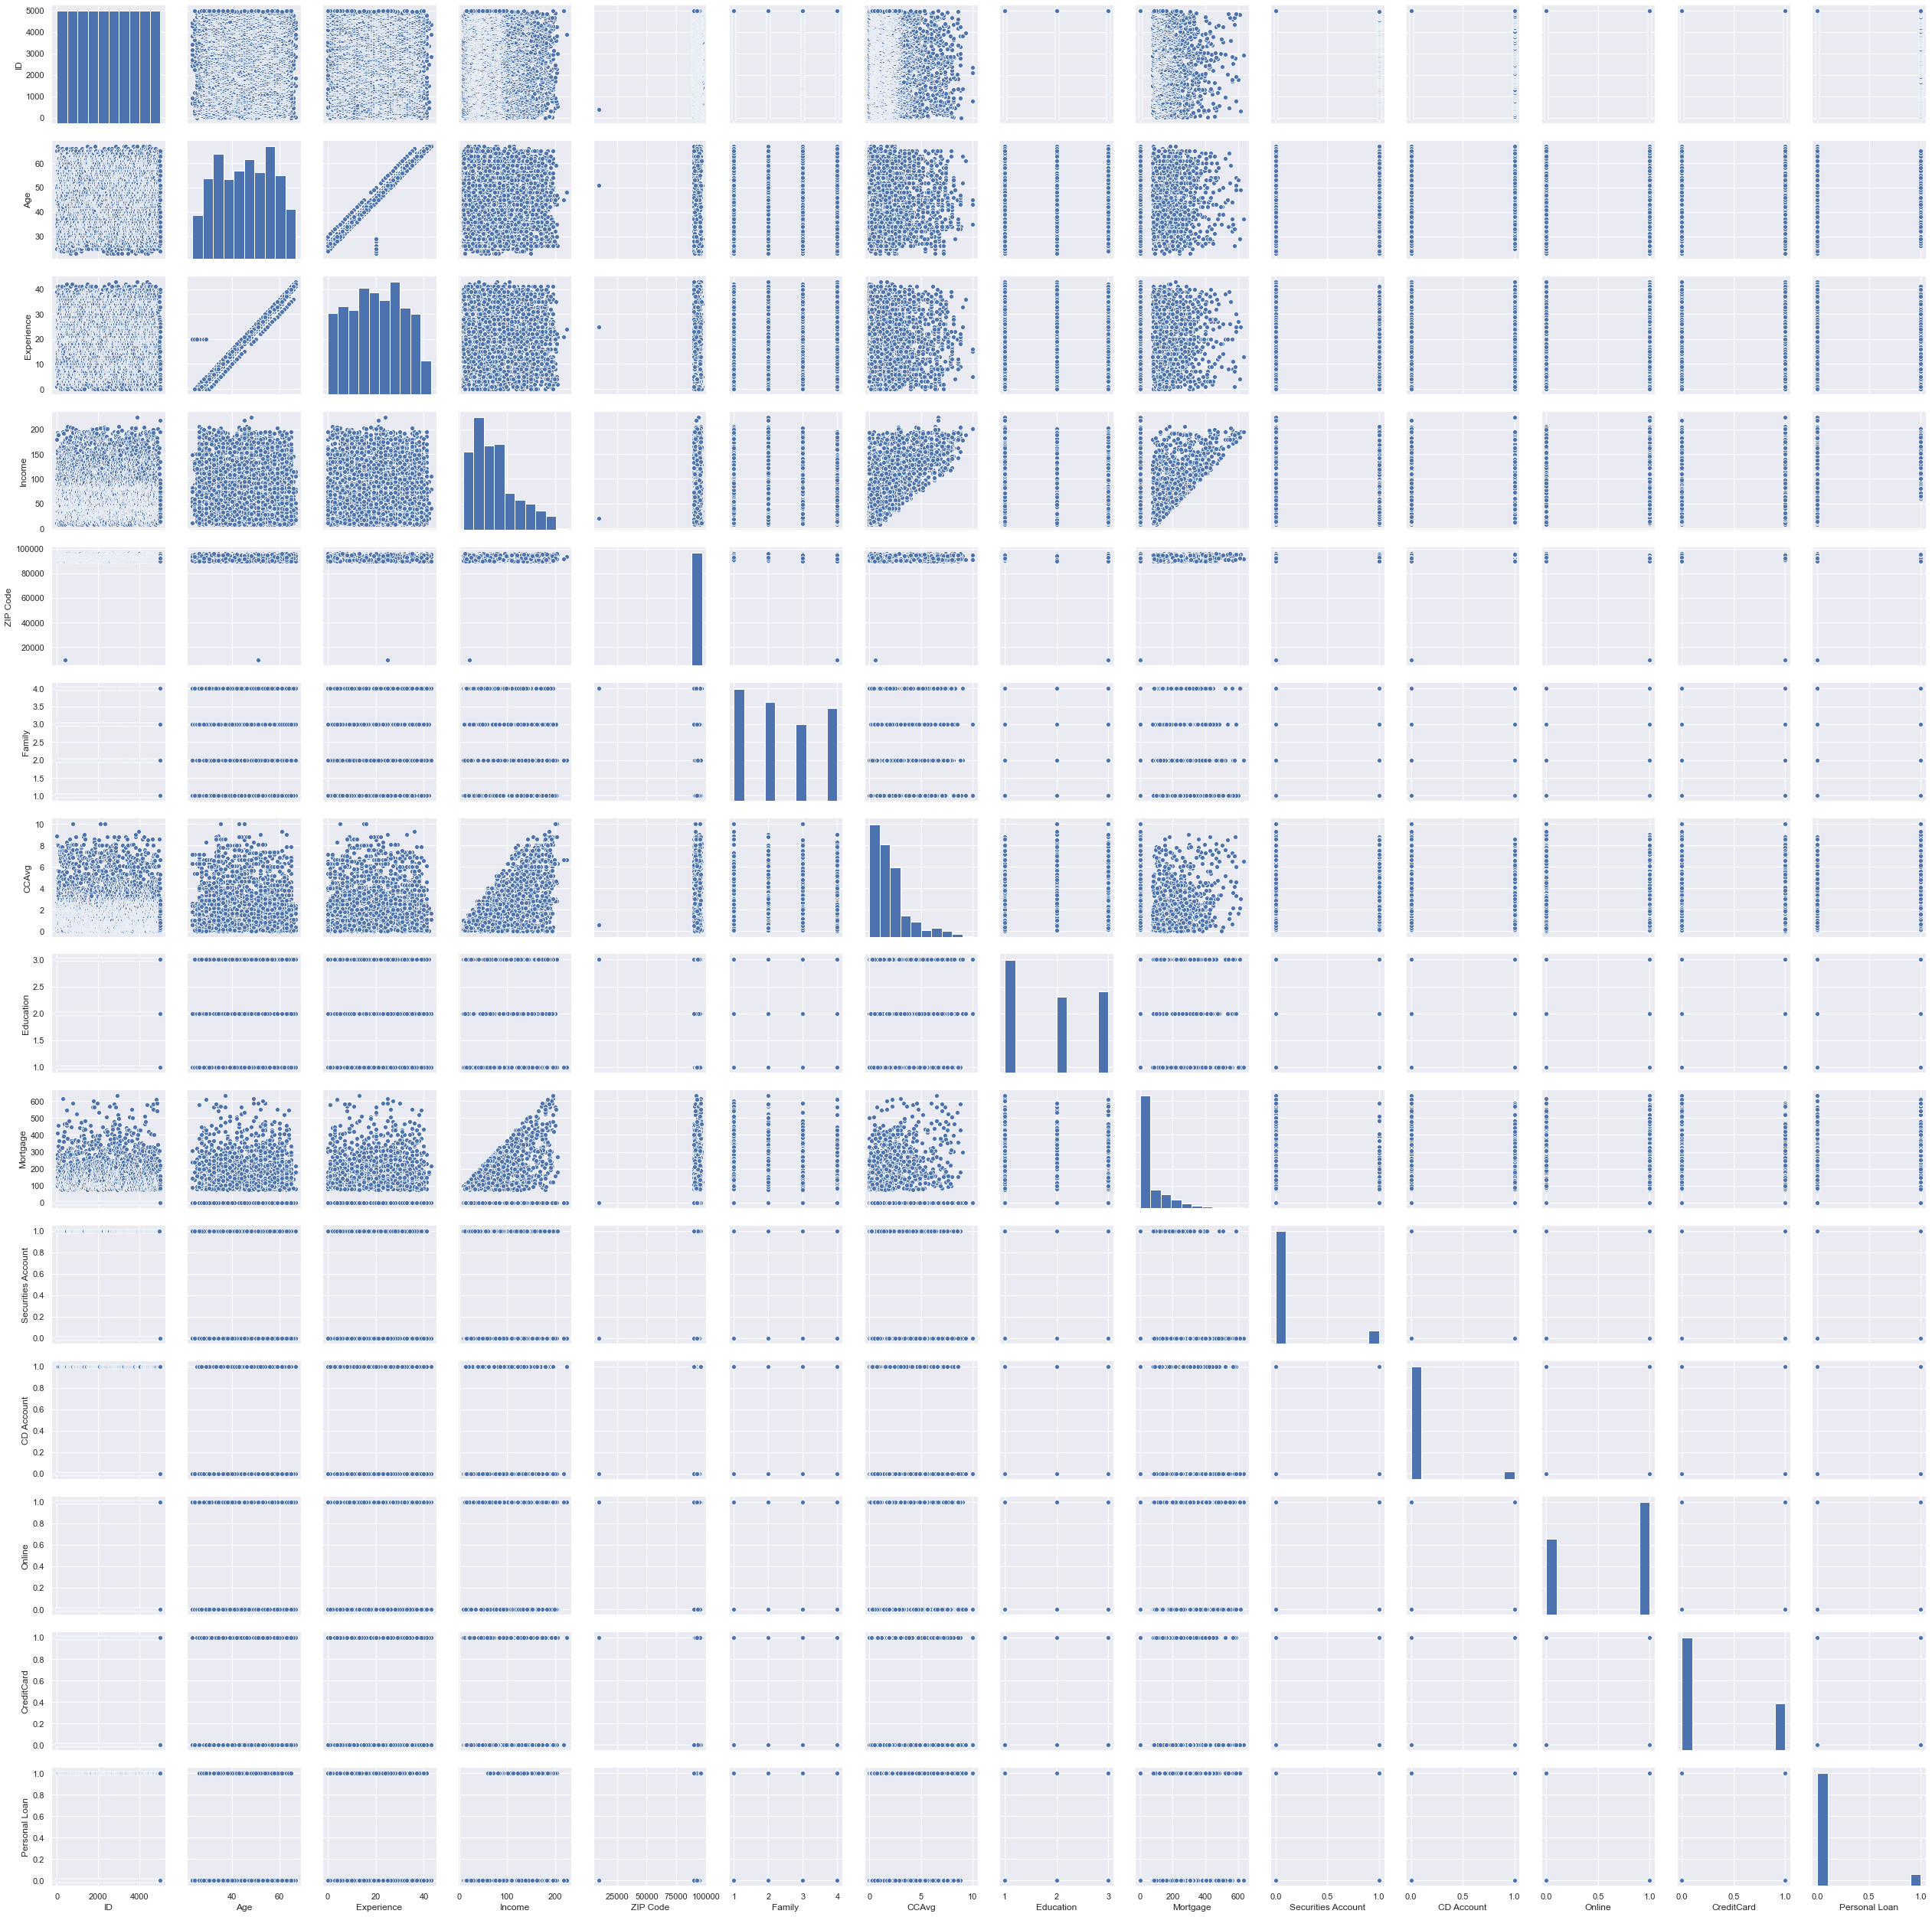

In [191]:
sns.pairplot(pldata);

#### Analysis    
**Age** and **Experience** have strong correlation.    
**Income** and **Credit Card Spending** have association and seems to have positive correlation.

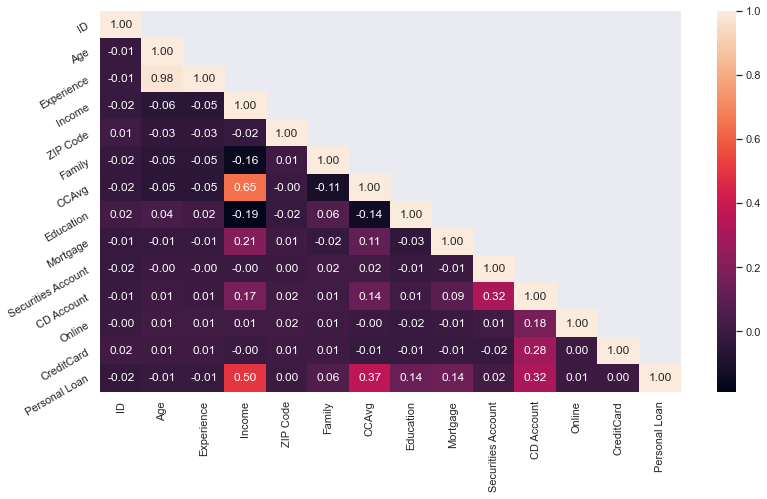

In [192]:
corr = pldata.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

#### Analysis     
Heatmap provide eveident that **Income** and **CCAvg** are moderately correlated.    
**Age** and **Experience** are almost perfectly correlated.    

### Categorical Variable Analysis

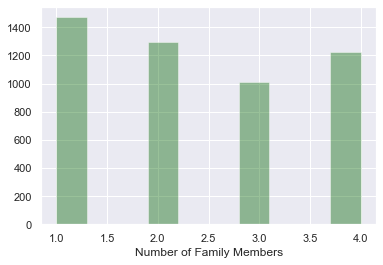

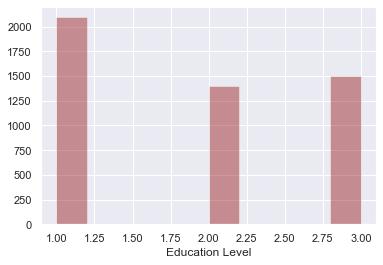

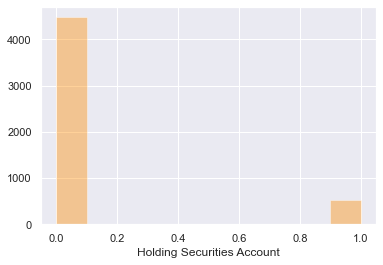

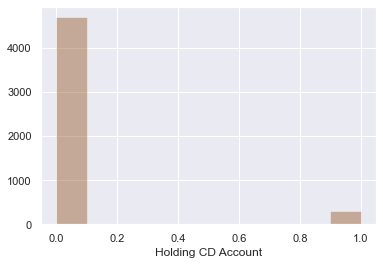

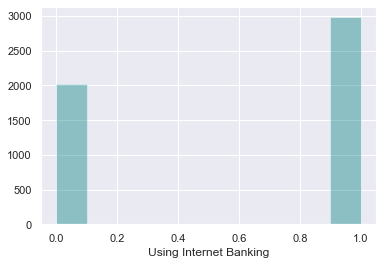

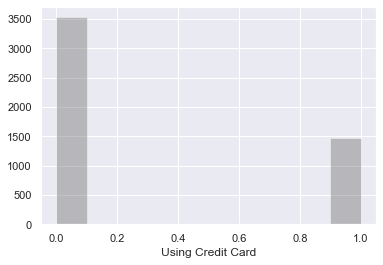

In [193]:
# Plot the columns to visually understand the distribution of the data
sns.distplot(pldata['Family'],bins=10, kde=False, axlabel='Number of Family Members',color="darkgreen")
plt.show()
sns.distplot(pldata['Education'],bins=10, kde=False, axlabel='Education Level', color="darkred")
plt.show()
sns.distplot(pldata['Securities Account'],bins=10, kde=False, axlabel='Holding Securities Account', color="darkorange")
plt.show()
sns.distplot(pldata['CD Account'],bins=10, kde=False, axlabel='Holding CD Account', color="saddlebrown")
plt.show()
sns.distplot(pldata['Online'],bins=10, kde=False, axlabel='Using Internet Banking', color="teal")
plt.show() 
sns.distplot(pldata['CreditCard'],bins=10, kde=False, axlabel='Using Credit Card', color="dimgray")
plt.show() 

#### Analysis    
**Family Size** is equally distributed    
**Securities Account** and **CD Account** are not held by large population      

### Target Variable Analysis: Personal Loan? (0/1)

In [194]:
pldata["Personal Loan"].value_counts().to_frame()

,Personal Loan
0,4520
1,480


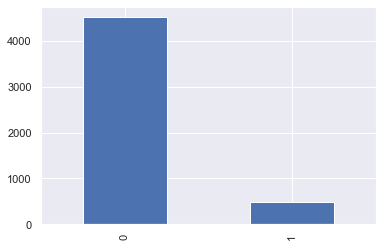

In [195]:
pd.value_counts(pldata["Personal Loan"]).plot(kind="bar")

### Analysis of influence of Independent Variables vs Target Variable

Cross Tabulation of Personal Loan & Education as percentage: 
 Personal Loan          0          1
Education                          
1              95.562977   4.437023
2              87.027798  12.972202
3              86.342438  13.657562


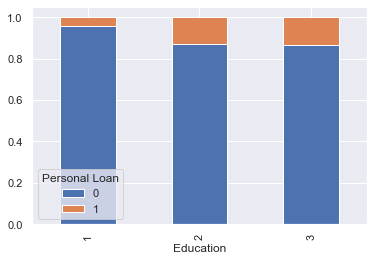

In [196]:
edu=pd.crosstab(pldata['Education'],pldata['Personal Loan'])
edu.div(edu.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross Tabulation of Personal Loan & Education as percentage:','\n',edu.div(edu.sum(1).astype(float), axis=0).multiply(100))

Cross Tabulation of Personal Loan & Family Size as percentage: 
 Personal Loan          0          1
Family                             
1              92.730978   7.269022
2              91.820988   8.179012
3              86.831683  13.168317
4              89.034370  10.965630


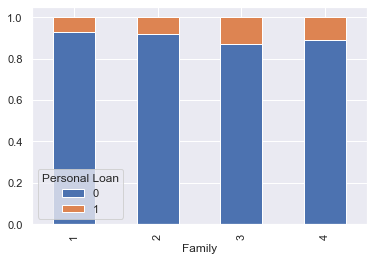

In [197]:
family=pd.crosstab(pldata['Family'],pldata['Personal Loan'])
family.div(family.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross Tabulation of Personal Loan & Family Size as percentage:','\n',family.div(family.sum(1).astype(float), axis=0).multiply(100))

Cross Tabulation of Personal Loan & Using Credit Card as percentage: 
 Personal Loan          0         1
CreditCard                        
0              90.453258  9.546742
1              90.272109  9.727891


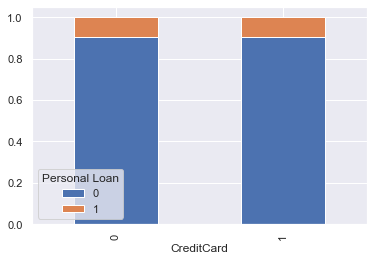

In [198]:
ccard=pd.crosstab(pldata['CreditCard'],pldata['Personal Loan'])
ccard.div(ccard.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross Tabulation of Personal Loan & Using Credit Card as percentage:','\n',ccard.div(ccard.sum(1).astype(float), axis=0).multiply(100))

#### Analysis
#### Can be inferred that customers who are more educated have a higher probability of buying personal loans. 
#### The number of family members does not significantly affect probability of buying loan from the bank.
#### Usage of credit card or not does not significantly impact the personal loan buying.

Cross Tabulation of Personal Loan & Having CD Account as percentage: 
 Personal Loan          0          1
CD Account                         
0              92.762878   7.237122
1              53.642384  46.357616


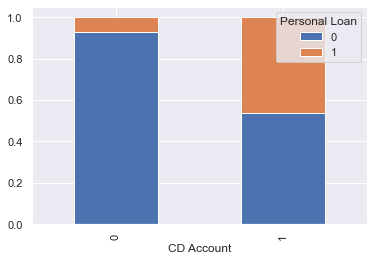

In [199]:
CDAcct=pd.crosstab(pldata['CD Account'],pldata['Personal Loan'])
CDAcct.div(CDAcct.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross Tabulation of Personal Loan & Having CD Account as percentage:','\n',CDAcct.div(CDAcct.sum(1).astype(float), axis=0).multiply(100))

Cross Tabulation of Personal Loan & Having Securities Account as percentage: 
 Personal Loan               0          1
Securities Account                      
0                   90.620813   9.379187
1                   88.505747  11.494253


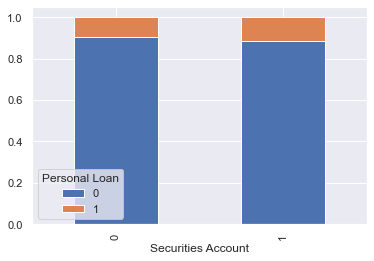

In [200]:
SecAcct=pd.crosstab(pldata['Securities Account'],pldata['Personal Loan'])
SecAcct.div(SecAcct.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross Tabulation of Personal Loan & Having Securities Account as percentage:','\n',SecAcct.div(SecAcct.sum(1).astype(float), axis=0).multiply(100))

Cross Tabulation of Personal Loan & Using Internet Banking as percentage: 
 Personal Loan          0         1
Online                            
0              90.625000  9.375000
1              90.247989  9.752011


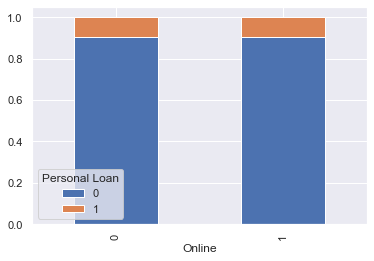

In [201]:
IntBank=pd.crosstab(pldata['Online'],pldata['Personal Loan'])
IntBank.div(IntBank.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
print('Cross Tabulation of Personal Loan & Using Internet Banking as percentage:','\n',IntBank.div(IntBank.sum(1).astype(float), axis=0).multiply(100))

#### Analysis
**The customer who has a certificate of deposit (CD) account with the bank seems to buy personal loans from the bank.   
Having Securities Account does not influence the buying of personal loan from the bank.     
The customer who uses or doesn’t use internet banking facilities seems to not affect the probability of buying personal loans.**

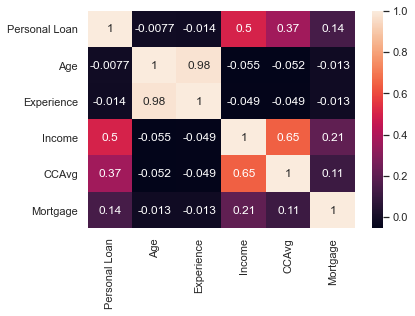

In [202]:
#Heatmap of Interval Variables and Target Variable. 
corrdt=pldata[['Personal Loan', 'Age', 'Experience','Income', 'CCAvg', 'Mortgage']].corr()
sns.heatmap(corrdt, annot = True)

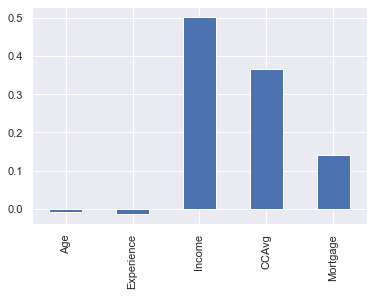

In [203]:
corrdt['Personal Loan'][1:].plot.bar()

#### Analysis
**Income**, **CC Average Spending**, **Mortgage** have some correlation on the decision to buy personal loan. **Age** and **Experience** have not much influence on personal loan buying, though both are almost perfectly correlated to each other. 

### Bivariate Analysis of the Target Variable

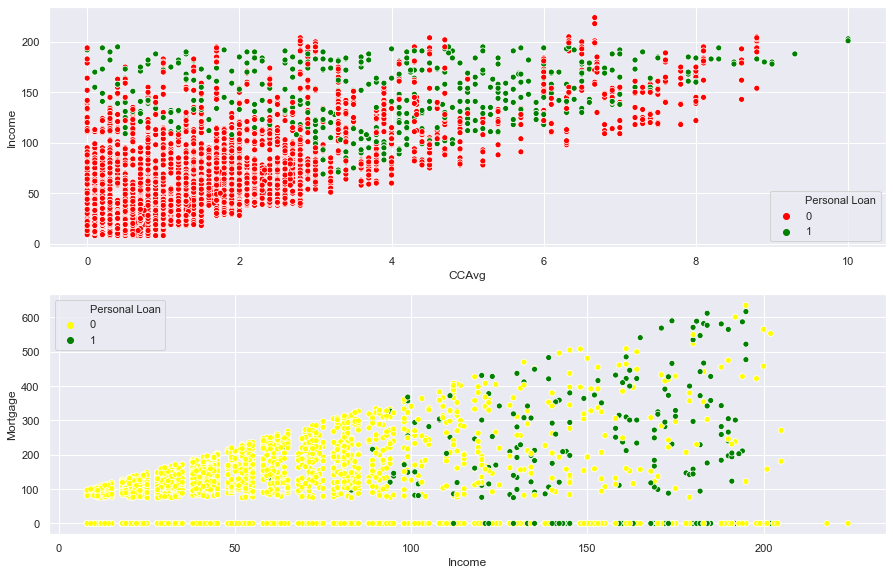

In [204]:
plt.figure(figsize=(15,15))

plt.subplot(3,1,1)
sns.scatterplot(pldata.CCAvg, pldata.Income, hue = pldata['Personal Loan'], palette= ['red','green'])

plt.subplot(3,1,2)
sns.scatterplot(pldata.Income, pldata.Mortgage, hue = pldata['Personal Loan'], palette= ['yellow','green'])

#### Analysis
1. It clearly shows that **Credit Card Average Spending** increases with increase in **Income**. **Buying Personal Loan** increases with higher income and credit card spending.
2. Again **Mortgage** values increases with **Income** and so is buying of **Personal Loan**

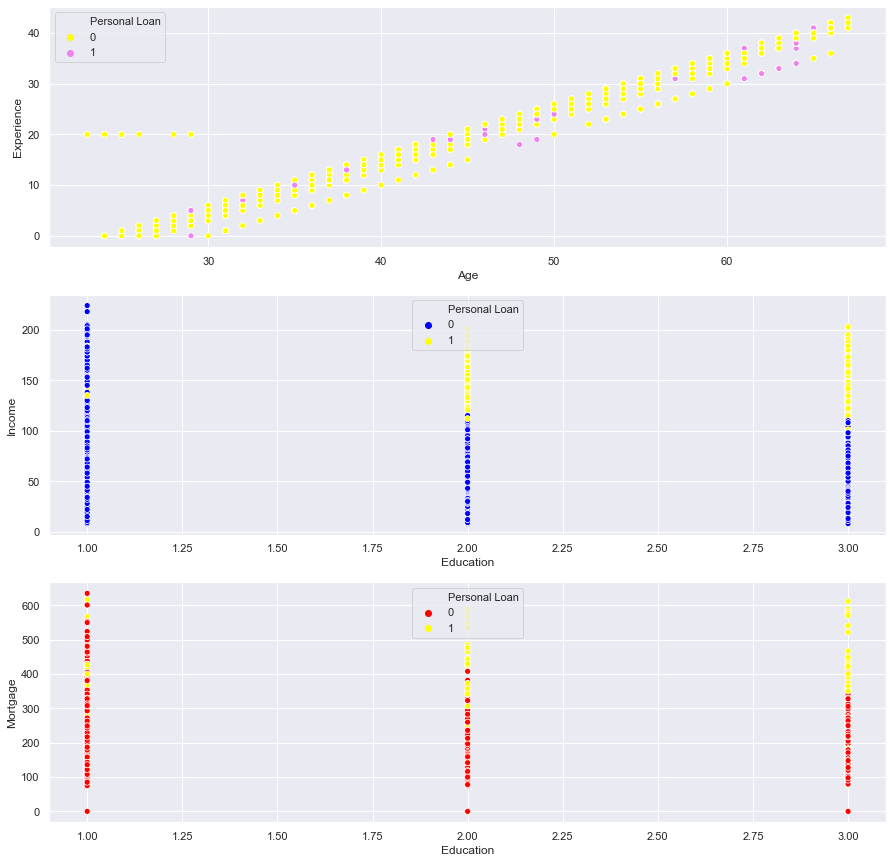

In [205]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.scatterplot(pldata.Age, pldata.Experience, hue = pldata['Personal Loan'], palette= ['yellow','violet'])

plt.subplot(3,1,2)
sns.scatterplot(pldata.Education, pldata.Income, hue = pldata['Personal Loan'], palette= ['blue','yellow'])

plt.subplot(3,1,3)
sns.scatterplot(pldata.Education, pldata.Mortgage, hue = pldata['Personal Loan'], palette= ['red','yellow'])

#### Analysis
1. **Age** and **Experience** have insignificant impact to **Personal Loan buying**
2. Customers having higher education with high income and mortgage seems to be buying more personal loans

## Split the data and run models

### Spliting the data to use 70% for training and 30% for testing

In [206]:
from sklearn.model_selection import train_test_split

X = pldata.drop(['ID','Experience','Personal Loan'],axis=1)     # Set of independent variables
Y = pldata['Personal Loan']                                     # Predicted Variable

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1334,47,35,94304,2,1.3,1,0,0,0,1,0
4768,38,39,93118,1,2.0,2,0,0,0,1,0
65,59,131,91360,1,3.8,1,0,0,0,1,1
177,29,65,94132,4,1.8,2,244,0,0,0,0
4489,39,21,95518,3,0.2,2,0,0,0,1,0


Removed **ID** and **Experience** columns as ID is which is customer id and nothing to do with the model attriibutes and Experience is almost perfectly correlated with Age and has no affect on Personal Loan

In [208]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(pldata.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(pldata.index)) * 100))

70.00% data is in training set
30.00% data is in test set


### Model Building: Logistic Regression

In [209]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

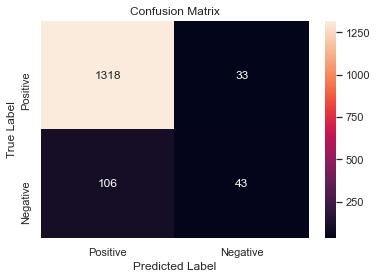

In [210]:

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_predict)

class_label = ["Positive", "Negative"]
df_cm = pd.DataFrame(cm, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [211]:
# Classification Report
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.29      0.38       149

    accuracy                           0.91      1500
   macro avg       0.75      0.63      0.67      1500
weighted avg       0.89      0.91      0.89      1500



In [212]:
LRmodel_score = model.score(x_test, y_test)
print('Model Score for Logistic Regression is: ',LRmodel_score)

Model Score for Logistic Regression is:  0.9073333333333333


### KNN 

In [213]:
# Creating odd list of K for KNN
myList = list(range(1,20))

# Subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [214]:
# Empty list that will hold accuracy scores
ac_scores = []
from sklearn.neighbors import KNeighborsClassifier
# Perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    
    # Predict the response
    y_predict = knn.predict(x_test)
    
    # Evaluate accuracy
    scores = metrics.accuracy_score(y_test, y_predict)
    ac_scores.append(scores)

# Changing to misclassification error
MSE = [1 - x for x in ac_scores]

# Determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 13


In [215]:
knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
knn.fit(x_train, y_train)    
y_predict = knn.predict(x_test)
knnacc = metrics.accuracy_score(y_test, y_predict)
print(knnacc)

0.9026666666666666


Text(0, 0.5, 'Misclassification Error')

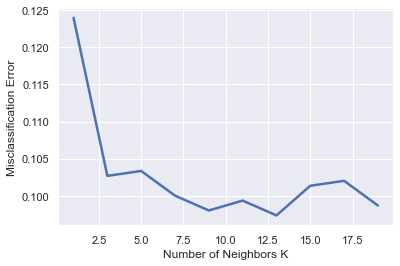

In [216]:
# Misclassification Error vs K
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')

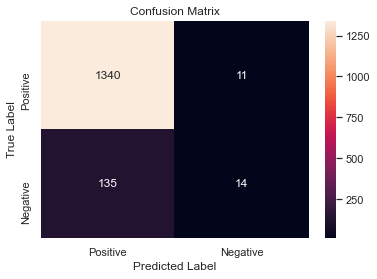

In [217]:
# Confusion Matrix
cm1 = metrics.confusion_matrix(y_test, y_predict)

class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [218]:
# Classification Report
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1351
           1       0.56      0.09      0.16       149

    accuracy                           0.90      1500
   macro avg       0.73      0.54      0.55      1500
weighted avg       0.87      0.90      0.87      1500



In [219]:
knnmodel_score = knn.score(x_test, y_test)
print('Model Score for KNN is: ',knnmodel_score)

Model Score for KNN is:  0.9026666666666666


### Naive Bayes

In [220]:
# Train Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# create the model
NB_model = GaussianNB()

NB_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [221]:
# Performance of our model with training data
PL_train_predict = NB_model.predict(x_train)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, PL_train_predict)))

Model Accuracy: 0.8949


In [222]:
# Performance of our model with testing data
PL_test_predict = NB_model.predict(x_test)

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, PL_test_predict)))

Model Accuracy: 0.8833


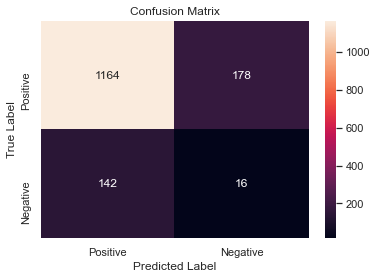

In [223]:
# Confusion Matrix
cm2 = metrics.confusion_matrix(test_labels, PL_test_predict)

class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [224]:
print("Classification Report")
print(metrics.classification_report(y_test, PL_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.43      0.56      0.49       149
           0       0.95      0.92      0.93      1351

    accuracy                           0.88      1500
   macro avg       0.69      0.74      0.71      1500
weighted avg       0.90      0.88      0.89      1500



### Model Comparison

KNN: 0.898600 (0.008902)
LR: 0.908000 (0.008149)
NB: 0.885600 (0.010385)


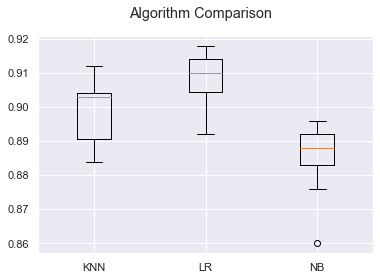

In [225]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression(solver="liblinear")))
models.append(('NB', GaussianNB()))
from sklearn import model_selection
# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=12345)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Summary

- The aim of the Thera Bank is to convert there liability customers into loan customers.
- They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.
- Three classification algorithms were used in this study.
- From the above graph , it seems like 'Logistic Regression' algorithm have the highest accuracy and we can choose that as our final model

## Models with Scaled Data

In [226]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,robust_scale
scaler = StandardScaler();

colscal=["ZIP Code","Age","Online","CreditCard","Education","Mortgage","Income","CCAvg","Family","CD Account", "Securities Account"]

scaler_x_train = scaler.fit_transform(x_train[colscal])
scaler_x_test = scaler.fit_transform(x_test[colscal])

In [227]:
# Logistic Regression with Scaled Data
scaled_model = LogisticRegression(solver="liblinear")
scaled_model.fit(scaler_x_train, y_train)

#predict on test
scaler_y_predict = scaled_model.predict(scaler_x_test)
print(metrics.classification_report(y_test,scaler_y_predict))
print(metrics.confusion_matrix(y_test,scaler_y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1351
           1       0.83      0.59      0.69       149

    accuracy                           0.95      1500
   macro avg       0.89      0.79      0.83      1500
weighted avg       0.94      0.95      0.94      1500

[[1333   18]
 [  61   88]]


In [228]:
# KNN with scaled data
scaled_knn = KNeighborsClassifier(n_neighbors= 13 , weights = 'uniform', metric = 'euclidean')
scaled_knn.fit(scaler_x_train, y_train)    
scaler_y_predict = scaled_knn.predict(scaler_x_test)
print(metrics.accuracy_score(y_test, scaler_y_predict))
print(metrics.classification_report(y_test,scaler_y_predict))
print(metrics.confusion_matrix(y_test,scaler_y_predict))

0.9446666666666667
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1351
           1       0.96      0.46      0.62       149

    accuracy                           0.94      1500
   macro avg       0.95      0.73      0.80      1500
weighted avg       0.95      0.94      0.94      1500

[[1348    3]
 [  80   69]]


In [229]:
# Naive Bayes Model
scaled_NB_model = GaussianNB()
scaled_NB_model.fit(scaler_x_train, y_train.ravel())
scaler_y_predict = scaled_NB_model.predict(scaler_x_test)
print(metrics.accuracy_score(y_test, scaler_y_predict))
print(metrics.classification_report(y_test,scaler_y_predict))
print(metrics.confusion_matrix(y_test,scaler_y_predict))

0.8686666666666667
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      1351
           1       0.38      0.52      0.44       149

    accuracy                           0.87      1500
   macro avg       0.66      0.72      0.68      1500
weighted avg       0.89      0.87      0.88      1500

[[1225  126]
 [  71   78]]


### Scaled Data Summary
#### Looking at the data we have different scales and units. e.g. Income is given annually while Credit Card Spending in monthly and have overall Mortgage value. We find the impressive improvement of more than 4% in the accuracy by using the scaled data.

#### Logistic Regression has come out to be the best model interms of accuracy with the given dataset.

#### Recall value has also improved across the models.

##                                                       ***** Assignment End ***** 